## 2-canyon run, Astoria base, higher N

Calibration for probes from 12 Jul 2019 

### General description and comments
Repeat of Experiment 04jul19 (second experiment of planned list) but this time using P20 and ANK probes separately to avoid interference. This requires to use the calibration from 12jul19 when ANK1,2 were calibrated separately from P20 using 10 saline solutions. Manual focus 5.6 m from camera settings.

I also took measurements of ANK1 and 2 every 30 min during spin-up to see if there are oscillations before the experiment starts or if they die out before the experiment. This requires me to plug and unplug ANK probes and P20 and restart matlab everytime throughout the experiment.

I knocked the tank pretty hard with my shoulder while I was trying to see if there were enough particles before doing run01, so I decided to wait another 30 min before running it.

Using new particles made between July 11th and 12th - used a mix of 10-20% to 50-60%, with larger amount of 40-50% particles because those are supposed to be closer in density to the density expected at shelf break depth. But I only got 3 distinct layers of particles, the first one higher than shelf break and the second one deeper. For run 02 I adjusted the laser sheet to the second particle layer, not quite the 2nd depth I usually do.

### Stratification
800 g salt bucket 1 (Started filling at 12:15, ended 13:55)

$\rho_{b1}=1.03022$ g cm$^{-3}$ at 20.030  deg C 

$\rho_{b2}=0.99850$ g cm$^{-3}$ at 20.036  deg C

### Rotation and forcing

|$f$| rad s$^{-1}$|$\Delta t$ /s|Description|
|:-:|:-:|:-:|:-:|
|$f_0$|0.50| - |background, spin up  |
|$f_1$|0.54|21|ramp up|
|$f_2$|0.58|50|avoid spin down|
|$f_2$ to $f_0$|-|15 min|ramp down to background $f$|

### Conduino

* run01 - (15:38) experiment01.mat
* run02 - (18:50) experiment02.mat

### PIV

Reference picture:  69.93 pix/cm

* Light sheet depths  4.6 cm,  3.2 cm 

run01 video - starts at   sec

run02 video starts at  sec

### Density samples

**run01 (16:25)**

|Density/g cm$^{-3}$|Temperature/$^{\circ}$C|Depth/cm|
|:-:|:-:|:-:|
|1.01043|20.035|surface-ish|
|1.01631|20.025|3.1|
|1.02769|20.025|9.5|

**run02 (18:20)**

|Density/g cm$^{-3}$|Temperature/$^{\circ}$C|Depth/cm|
|:-:|:-:|:-:|
|1.01131|20.020|surface-ish|
|1.01672|20.005|3.1|
|1.02763|20.017|9.5|

### Profiler
*  16:30, run01 file - `profile01.mat`
*  18:20, run02 file - `profile02.mat`

In [1]:
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import os
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import profiler_tools as ptools
import conduino_tools as ctools


In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
def plot_uprofile(ax, col='0.8'):
    ax.axvline(21.0, color=col, linestyle=':')
    ax.axvline(71.0, color=col, linestyle=':')
        
def plot_forcing(ax, file, f0, f1, f2, t0, t1):
    '''ax: axes to plot figure on
       file: experiment file to extract time
       f0: Angular velocity of the table during spin up
       f1: f at max forcing
       f2: f to avoid spin down
       t0: time to get to f1
       t1: time to get to f2'''
    mat = sio.loadmat(file, squeeze_me=True)
    time = mat['time']
    t2 = np.round(np.max(time),2) # s

    ax0.text(0.3,0.3,r'$\Delta f_1=$%1.2f rad/s, $\Delta t_1=$%1.1f s' %((f1-f0),t0), transform=ax0.transAxes)
    ax0.text(0.5,0.7,r'$\Delta f_2=$%1.2f rad/s, $\Delta t_2=$%1.1f s' %((f2-f1),(t1-t0)), transform=ax0.transAxes)

    ax0.plot([0,t0,t1,t2],[f0,f1,f2,f2], 'g-')
    ax0.set_ylabel('f table / rad s$^{-1}$')
    ax0.set_xlabel('time / s')

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P20|



### Forcing

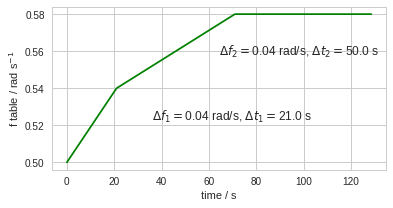

In [5]:
fig, ax0 = plt.subplots(1,1, figsize=(6,3), sharex=True)

f0 = 0.50 # initial f rad/s
f1 = 0.54 # rad/s
f2 = 0.58 # rad/s
t0 = 21.0 # s
t1 = 71.0 # s
exp_file = '../experiments/exp_13jul19/experiment01.mat'

plot_forcing(ax0, exp_file, f0, f1, f2, t0, t1)

### All readings 

Text(0.5,0,'time / s')

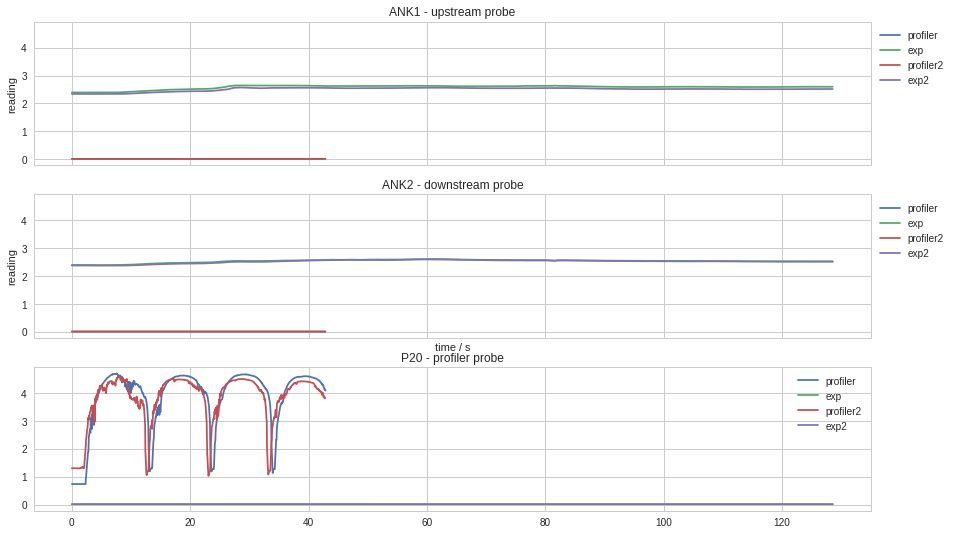

In [6]:
fig, (ax0,ax1, ax2) = plt.subplots(3,1, figsize=(15,9), sharex=True, sharey=True)

labels = [ 'profiler', 'exp', 'profiler2', 'exp2']

filepaths = ['../experiments/exp_13jul19/profile01.mat',
             '../experiments/exp_13jul19/experiment01.mat',
             '../experiments/exp_13jul19/profile02.mat',
             '../experiments/exp_13jul19/experiment02.mat',
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    P3 = mat['ch3']
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,P3, label=lab)

ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')

ax1.set_xlabel('time / s')

### Profiles

(0, 45)

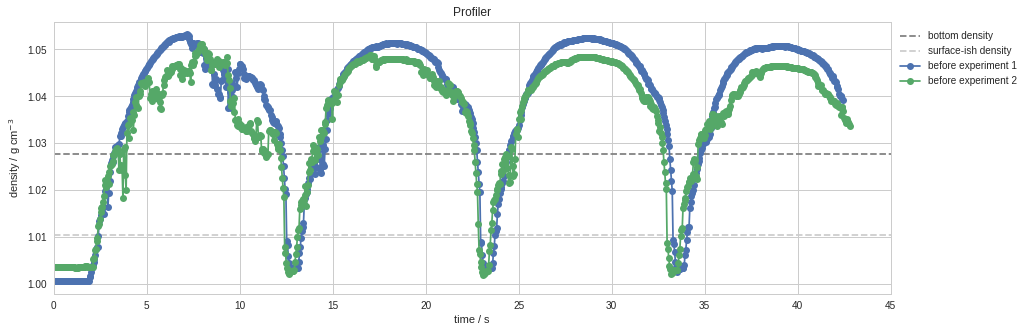

In [7]:
fig, (ax0) = plt.subplots(1,1, figsize=(15,5), sharex=True)
ax0.axhline(1.02769,color='0.5', linestyle='--', label='bottom density')
ax0.axhline(1.01043,color='0.8', linestyle='--', label='surface-ish density')

labels=['before experiment 1', 'before experiment 2','before experiment 3']

filepaths = ['../experiments/exp_13jul19/profile01.mat',
             '../experiments/exp_13jul19/profile02.mat',
             ]
ind_offset = [10,0]
for filepath, lab, ind in zip(filepaths, labels, ind_offset):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']# dens_B(mat['ch1'])
    time = mat['time']
    densP3 = ctools.densP_12Jul19(P3)
    
    ax0.plot(time[ind:]-time[ind],densP3[ind:],'o-', label=lab)

ax0.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('Profiler')
ax0.set_xlabel('time / s')
ax0.set_xlim(0,45)

No handles with labels found to put in legend.


Text(0.5,0,'time / s')

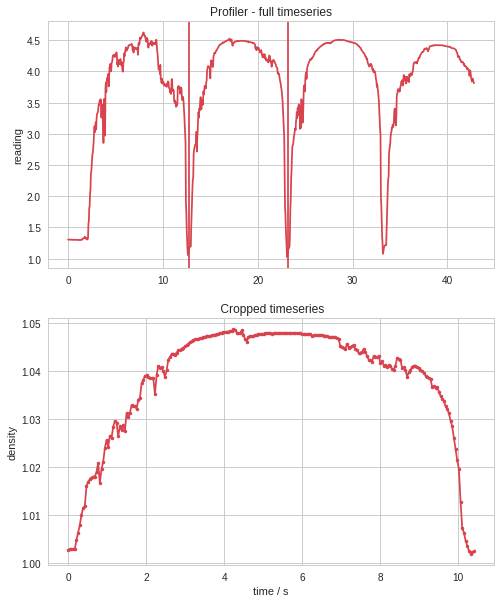

In [39]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(8,10))

filepaths = ['../experiments/exp_13jul19/profile02.mat',
             ]
ini_indices = [298]
end_indices = [542]

for filepath, ind, end in zip(filepaths, ini_indices, end_indices):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']
    time = mat['time']
    ax0.plot(time[:],P3[:])
    ax0.axvline(time[ind])
    ax0.axvline(time[end])
    
    ax1.plot(time[ind:end]-time[ind],ctools.densP_12Jul19(P3[ind:end]),'.-')
    
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('density')

ax0.set_title('Profiler - full timeseries')
ax1.set_title(' Cropped timeseries')
ax1.set_xlabel('time / s')

In [ ]:
filepath = '../../Conduino/experiments/exp_13jul19/profile02.mat'   
ini = 298
end = 

fig, ax = plt.subplots(1,1,figsize=(4,4))
mat = sio.loadmat(filepath, squeeze_me=True)
P3 = mat['ch3'] #dens_C(mat['ch2'])
time_cond = mat['time']
   
time_int = time_cond[ind:end]-time_cond[ind]
dist_int = ptools.profiler_11jun(time_int)

ax.plot(ctools.densP_02May19(P3[ind:end]),dist_int, label='profiler', color='yellowgreen')
ax.scatter(1.00893,-3.0, marker='^', color='purple')
ax.scatter(1.01519,-9.6, marker='^', color='purple')
ax.scatter(1.00445,-0.2, marker='^', color='purple')

ax.annotate('downcast', xy=(1.0275, -3.5), xytext=(1.015, -6),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('upcast', xy=(1.025, -1.5), xytext=(1.025, 1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

### Experiment

../experiments/exp_13jul19/experiment01.mat
../experiments/exp_13jul19/experiment02.mat


Text(0.5,0,'sample')

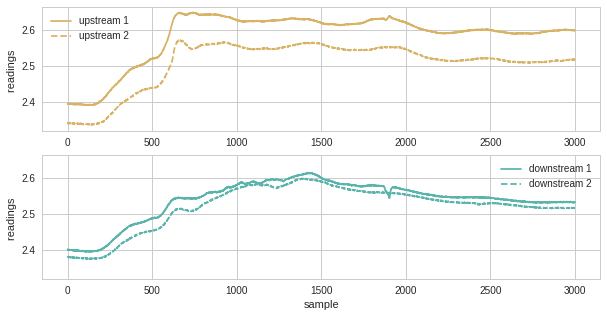

In [8]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,5), sharey=True)
labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2'],['upstream 3', 'downstream 3']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':']
files = ['../experiments/exp_13jul19/experiment01.mat',
         '../experiments/exp_13jul19/experiment02.mat']
for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(P1,'-', label=lab[0], color=colors[0], linestyle=sty)
    ax1.plot(P2,'-', label=lab[1], color=colors[1], linestyle=sty)
ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('readings ')
ax1.set_ylabel('readings ')
ax1.set_xlabel('sample')

../experiments/exp_13jul19/experiment01.mat
../experiments/exp_13jul19/experiment02.mat


Text(0.5,1,'Probe density')

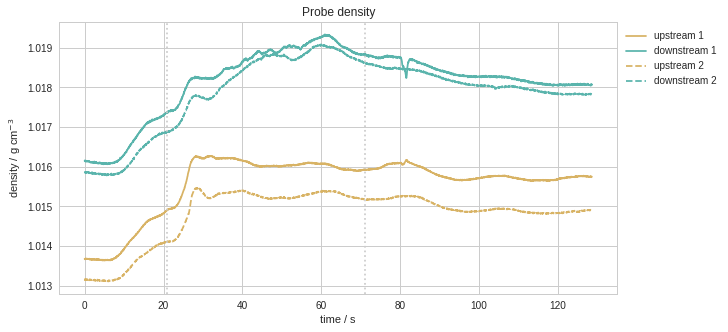

In [9]:
fig, ax0 = plt.subplots(1,1, figsize=(10,5), sharey=True)
labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2'],['upstream 3', 'downstream 3']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':']
files = ['../experiments/exp_13jul19/experiment01.mat',
         '../experiments/exp_13jul19/experiment02.mat']
for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,ctools.densANK1_12Jul19(P1),'-', label=lab[0], color=colors[0], linestyle=sty)
    ax0.plot(time,ctools.densANK2_12Jul19(P2),'-', label=lab[1], color=colors[1], linestyle=sty)

plot_uprofile(ax0)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density')


../experiments/exp_13jul19/experiment01.mat
../experiments/exp_13jul19/experiment02.mat


Text(0.5,1,'Probe density minus initial density')

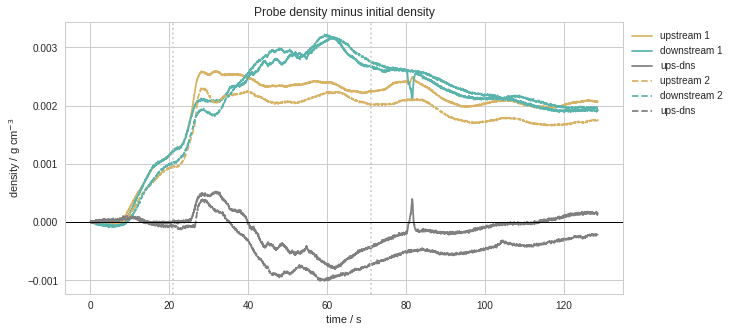

In [11]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2'],['upstream 3', 'downstream 3']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':']
files = ['../experiments/exp_13jul19/experiment01.mat',
         '../experiments/exp_13jul19/experiment02.mat']
for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,ctools.densANK1_12Jul19(P1)-ctools.densANK1_12Jul19(P1)[0],'-', 
             label=lab[0], color=colors[0], linestyle=sty)
    ax0.plot(time,ctools.densANK2_12Jul19(P2)-ctools.densANK2_12Jul19(P2)[0],'-', 
             label=lab[1], color=colors[1], linestyle=sty)
    ax0.plot(time,((ctools.densANK1_12Jul19(P1)-ctools.densANK1_12Jul19(P1)[0])-
                   (ctools.densANK2_12Jul19(P2)-ctools.densANK2_12Jul19(P2)[0])),
             '-', label='ups-dns',linestyle=sty, color='0.5')

plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')


### What were the probes measuring during spin up and before experiments?

../experiments/exp_13jul19/ANK_14_08.mat
../experiments/exp_13jul19/ANK_14_38.mat
../experiments/exp_13jul19/ANK_15_10.mat
../experiments/exp_13jul19/ANK_15_42.mat
../experiments/exp_13jul19/ANK_16_11.mat
../experiments/exp_13jul19/ANK_16_32.mat
../experiments/exp_13jul19/ANK_17_35.mat
../experiments/exp_13jul19/ANK_18_45.mat


Text(0.5,1,'Probe density minus initial density')

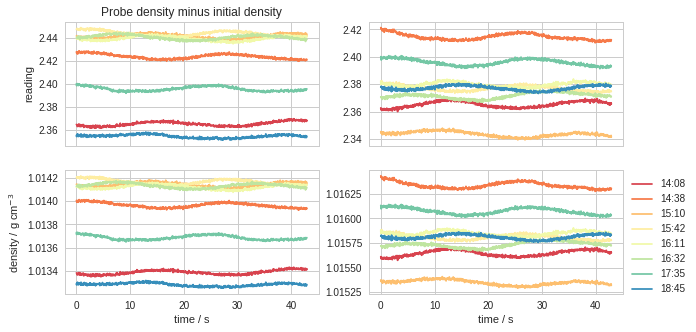

In [28]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(10,5), sharex=True)

labels = ['14:08','14:38','15:10','15:42','16:11','16:32','17:35','18:45']
files = ['../experiments/exp_13jul19/ANK_14_08.mat',
         '../experiments/exp_13jul19/ANK_14_38.mat',
         '../experiments/exp_13jul19/ANK_15_10.mat',
         '../experiments/exp_13jul19/ANK_15_42.mat',
         '../experiments/exp_13jul19/ANK_16_11.mat',
         '../experiments/exp_13jul19/ANK_16_32.mat',
         '../experiments/exp_13jul19/ANK_17_35.mat',
         '../experiments/exp_13jul19/ANK_18_45.mat',
        ]
sns.set_palette('Spectral', len(files))
for filepath, lab in zip(files, labels):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']

    ax0.plot(time,P1,'-', 
             label=lab)
    ax1.plot(time,P2,'-',label=lab)

    ax2.plot(time,ctools.densANK1_12Jul19(P1),'-', 
             label=lab)
    ax3.plot(time,ctools.densANK2_12Jul19(P2),'-', 
             label=lab)

ax3.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading')
ax2.set_ylabel('density / g cm$^{-3}$')
ax2.set_xlabel('time / s')
ax3.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')
